In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rc("font", family="NanumGothic")

In [2]:
df=pd.read_csv("C:/Users/campus4D038/Desktop/프로젝트 1/Merge_2.csv")

In [3]:
df.columns

Index(['거래일자', '수수료율', '고객ID', '프로그램수정횟수', '추가결제금액', '거래취소여부', '서비스명', '판매자',
       '판매금액', '서비스가격', '평점', '이용자수', '대분류', '서비스번호', '총금액', '매출', '사용기기',
       '사용OS', '유입경로', '회원상태', '거주지', '연령', '서비스총구매수', '총구매금액', '총수정요청수',
       '총추가결제금액', '판매수', '판매자ID', '판매 서비스 수', '총 판매 금액', '프리미엄 서비스 가입여부',
       '신속 알람 서비스 사용여부'],
      dtype='object')

In [4]:
df_selected = df[['서비스가격', '서비스번호', '거래취소여부']]

df_grouped = df_selected.groupby('서비스번호').agg(
    취소된_거래수=('거래취소여부', lambda x: (x == 1).sum()),  # 거래취소여부가 1인 취소된 거래 수
    전체_거래수=('거래취소여부', 'count')                    # 서비스명별 전체 거래 수
).reset_index()

# 거래취소율 계산
df_grouped['거래취소율'] = (df_grouped['취소된_거래수'] / df_grouped['전체_거래수']) * 100

# 서비스명별 가격은 첫 번째 값만 가져오기 (서비스번호별 가격은 동일하므로 첫 번째 값만 사용)
df_grouped['서비스가격'] = df.groupby('서비스번호')['서비스가격'].first().values

df_3 = df_grouped[['서비스가격', '서비스번호', '거래취소율']]

df_3

,서비스가격,서비스번호,거래취소율
0,5000.0,2102.0,1.256281
1,10000.0,2103.0,2.434337
2,50000.0,2105.0,2.083333
3,5000.0,2106.0,3.589744
4,5000.0,2107.0,1.207938
...,...,...,...
2857,850000.0,6488.0,0.000000
2858,550000.0,6489.0,0.000000
2859,380000.0,6494.0,0.000000
2860,33000.0,6495.0,0.000000


In [5]:
df1=df[['서비스번호','판매 서비스 수','이용자수','프리미엄 서비스 가입여부','신속 알람 서비스 사용여부','평점','서비스가격','대분류','총 판매 금액','총수정요청수']]

In [6]:
df1 = pd.merge(df1,df_3,on='서비스번호')

In [7]:
df1 = pd.get_dummies(df1, columns=["대분류"], drop_first=True)
df1["프리미엄 서비스 가입여부"] = df1["프리미엄 서비스 가입여부"].map({"가입": 1, "미가입": 0})
df1["신속 알람 서비스 사용여부"] = df1["신속 알람 서비스 사용여부"].map({"사용": 1, "미사용": 0})

In [8]:
df1 = pd.merge(df1, df_grouped, on='서비스번호')

In [9]:
df1

,서비스번호,판매 서비스 수,이용자수,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부,평점,서비스가격_x,총 판매 금액,총수정요청수,서비스가격_y,...,대분류_모바일,대분류_인공지능,대분류_커머스,대분류_프로그래밍,대분류_프로그램,대분류_홈페이지,취소된_거래수,전체_거래수,거래취소율_y,서비스가격
0,2102.0,402,584.0,0,0,5.0,5000.0,4434580.0,0,5000.0,...,False,False,True,False,False,False,5,398,1.256281,5000.0
1,2102.0,402,584.0,0,0,5.0,5000.0,4434580.0,0,5000.0,...,False,False,True,False,False,False,5,398,1.256281,5000.0
2,2102.0,402,584.0,0,0,5.0,5000.0,4434580.0,0,5000.0,...,False,False,True,False,False,False,5,398,1.256281,5000.0
3,2102.0,402,584.0,0,0,5.0,5000.0,4434580.0,1,5000.0,...,False,False,True,False,False,False,5,398,1.256281,5000.0
4,2102.0,402,584.0,0,0,5.0,5000.0,4434580.0,25,5000.0,...,False,False,True,False,False,False,5,398,1.256281,5000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335777,6472.0,1,0.0,0,0,0.0,200000.0,203200.0,1,200000.0,...,False,False,True,False,False,False,0,1,0.000000,200000.0
335778,6483.0,38,0.0,0,0,0.0,700000.0,12366900.0,2,700000.0,...,False,False,False,False,False,True,0,3,0.000000,700000.0
335779,6483.0,38,0.0,0,0,0.0,700000.0,12366900.0,2,700000.0,...,False,False,False,False,False,True,0,3,0.000000,700000.0
335780,6483.0,38,0.0,0,0,0.0,700000.0,12366900.0,0,700000.0,...,False,False,False,False,False,True,0,3,0.000000,700000.0


In [47]:
df1

,서비스번호,판매 서비스 수,이용자수,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부,평점,서비스가격,총 판매 금액,총수정요청수,대분류_게임,...,대분류_기획,대분류_데이터,대분류_디자인,대분류_모바일,대분류_인공지능,대분류_커머스,대분류_프로그래밍,대분류_프로그램,대분류_홈페이지,거래취소율
0,2102.0,402,584.0,0,0,5.0,5000.0,4434580.0,0,False,...,False,False,False,False,False,True,False,False,False,1.256281
1,2102.0,402,584.0,0,0,5.0,5000.0,4434580.0,0,False,...,False,False,False,False,False,True,False,False,False,1.256281
2,2102.0,402,584.0,0,0,5.0,5000.0,4434580.0,0,False,...,False,False,False,False,False,True,False,False,False,1.256281
3,2102.0,402,584.0,0,0,5.0,5000.0,4434580.0,1,False,...,False,False,False,False,False,True,False,False,False,1.256281
4,2102.0,402,584.0,0,0,5.0,5000.0,4434580.0,25,False,...,False,False,False,False,False,True,False,False,False,1.256281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335777,6472.0,1,0.0,0,0,0.0,200000.0,203200.0,1,False,...,False,False,False,False,False,True,False,False,False,0.000000
335778,6483.0,38,0.0,0,0,0.0,700000.0,12366900.0,2,False,...,False,False,False,False,False,False,False,False,True,0.000000
335779,6483.0,38,0.0,0,0,0.0,700000.0,12366900.0,2,False,...,False,False,False,False,False,False,False,False,True,0.000000
335780,6483.0,38,0.0,0,0,0.0,700000.0,12366900.0,0,False,...,False,False,False,False,False,False,False,False,True,0.000000


## 서비스 특성과 판매 서비스 수 상관분석 

In [58]:
import scipy.stats as stats

# 분석할 변수 리스트
# variables = ["프리미엄 서비스 가입여부", "신속 알람 서비스 사용여부", "평점", "서비스가격","대분류"]  # 판매 서비스 수 제외
variables = df1.columns

# 상관계수 및 p-value 저장
correlation_results = {}

for var in variables:
    corr, p_value = stats.pearsonr(df1["판매 서비스 수"], df1[var])  # 각 변수와 판매서비스 수의 상관관계 계산
    correlation_results[var] = {"상관계수": round(corr,4), "p-value": round(p_value, 4)}

# 데이터프레임으로 변환 후 정렬
correlation_df = pd.DataFrame(correlation_results).T
correlation_df = correlation_df.sort_values("상관계수", ascending=False) # 정렬


print(correlation_df)

                  상관계수  p-value
판매 서비스 수        1.0000   0.0000
총 판매 금액         0.5609   0.0000
신속 알람 서비스 사용여부  0.3660   0.0000
프리미엄 서비스 가입여부   0.3430   0.0000
이용자수            0.2395   0.0000
대분류_커머스         0.2048   0.0000
대분류_데이터         0.1496   0.0000
평점              0.0679   0.0000
대분류_게임          0.0555   0.0000
대분류_기타          0.0026   0.1324
대분류_기획         -0.0007   0.6775
총수정요청수         -0.0159   0.0000
거래취소율          -0.0316   0.0000
대분류_인공지능       -0.0350   0.0000
대분류_디자인        -0.0527   0.0000
대분류_홈페이지       -0.0761   0.0000
대분류_프로그램       -0.0790   0.0000
대분류_프로그래밍      -0.0953   0.0000
대분류_모바일        -0.1114   0.0000
서비스가격          -0.1518   0.0000
서비스번호          -0.3405   0.0000


C:\Users\campus4D038\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.draw()
C:\Users\campus4D038\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


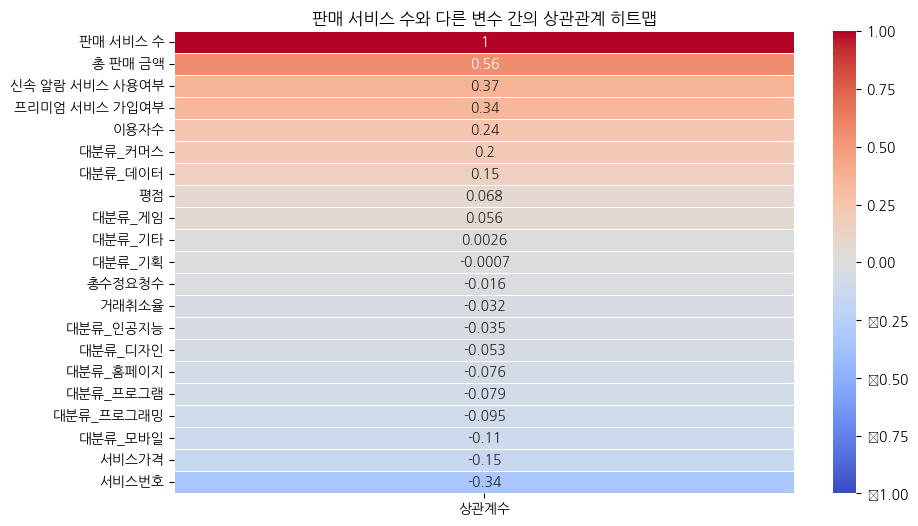

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# 히트맵 그리기
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_df[["상관계수"]], annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)

plt.title("판매 서비스 수와 다른 변수 간의 상관관계 히트맵")
plt.show()

C:\Users\campus4D038\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.draw()
C:\Users\campus4D038\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


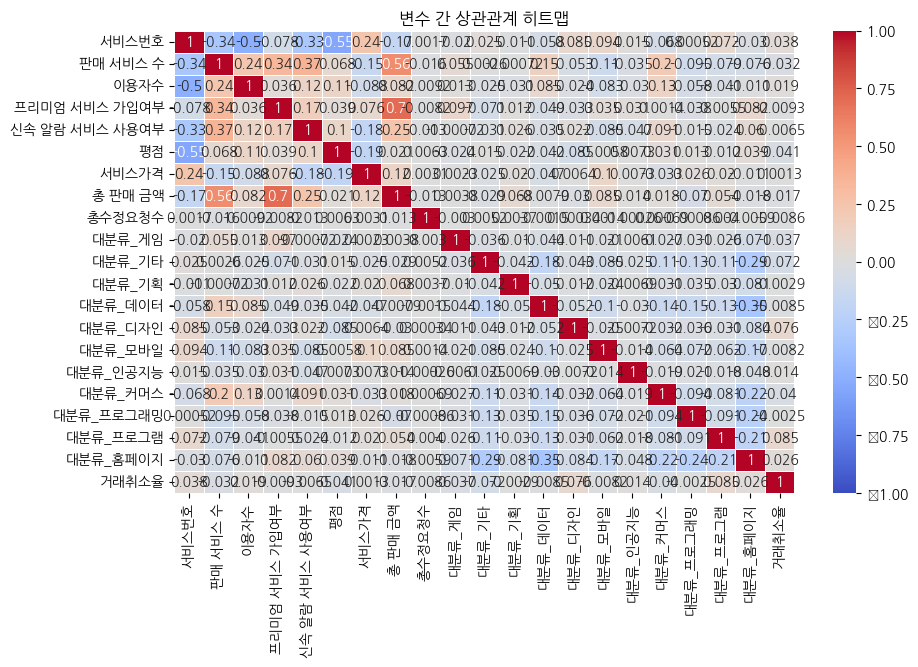

In [50]:
plt.figure(figsize=(10, 6))
sns.heatmap(df1.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)

plt.title("변수 간 상관관계 히트맵")
plt.show()

In [51]:
df1.columns

Index(['서비스번호', '판매 서비스 수', '이용자수', '프리미엄 서비스 가입여부', '신속 알람 서비스 사용여부', '평점',
       '서비스가격', '총 판매 금액', '총수정요청수', '대분류_게임', '대분류_기타', '대분류_기획', '대분류_데이터',
       '대분류_디자인', '대분류_모바일', '대분류_인공지능', '대분류_커머스', '대분류_프로그래밍', '대분류_프로그램',
       '대분류_홈페이지', '거래취소율'],
      dtype='object')

In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335782 entries, 0 to 335781
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   서비스번호           335782 non-null  float64
 1   판매 서비스 수        335782 non-null  int64  
 2   이용자수            335782 non-null  float64
 3   프리미엄 서비스 가입여부   335782 non-null  int64  
 4   신속 알람 서비스 사용여부  335782 non-null  int64  
 5   평점              335782 non-null  float64
 6   서비스가격           335782 non-null  float64
 7   총 판매 금액         335782 non-null  float64
 8   총수정요청수          335782 non-null  int64  
 9   대분류_게임          335782 non-null  bool   
 10  대분류_기타          335782 non-null  bool   
 11  대분류_기획          335782 non-null  bool   
 12  대분류_데이터         335782 non-null  bool   
 13  대분류_디자인         335782 non-null  bool   
 14  대분류_모바일         335782 non-null  bool   
 15  대분류_인공지능        335782 non-null  bool   
 16  대분류_커머스         335782 non-null  bool   
 17  대분류_프로그래밍 

In [53]:
# 대분류 관련 컬럼만 선택
category_columns = [col for col in df1.columns if col.startswith('대분류')]

# 각 대분류 컬럼을 int로 변환
df1[category_columns] = df1[category_columns].astype(int)

# 결과 확인
print(df1[category_columns].dtypes)

대분류_게임       int32
대분류_기타       int32
대분류_기획       int32
대분류_데이터      int32
대분류_디자인      int32
대분류_모바일      int32
대분류_인공지능     int32
대분류_커머스      int32
대분류_프로그래밍    int32
대분류_프로그램     int32
대분류_홈페이지     int32
dtype: object


### **회귀분석** 
### 종속변수 : 판매 서비스 수 

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335782 entries, 0 to 335781
Data columns (total 32 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   거래일자            335782 non-null  int64  
 1   수수료율            335782 non-null  float64
 2   고객ID            335782 non-null  int64  
 3   프로그램수정횟수        335782 non-null  int64  
 4   추가결제금액          335782 non-null  int64  
 5   거래취소여부          335782 non-null  float64
 6   서비스명            335782 non-null  object 
 7   판매자             335782 non-null  object 
 8   판매금액            335782 non-null  float64
 9   서비스가격           335782 non-null  float64
 10  평점              335782 non-null  float64
 11  이용자수            335782 non-null  float64
 12  대분류             335782 non-null  object 
 13  서비스번호           335782 non-null  float64
 14  총금액             335782 non-null  float64
 15  매출              335782 non-null  float64
 16  사용기기            335782 non-null  object 
 17  사용OS      

In [55]:
df1.columns

Index(['서비스번호', '판매 서비스 수', '이용자수', '프리미엄 서비스 가입여부', '신속 알람 서비스 사용여부', '평점',
       '서비스가격', '총 판매 금액', '총수정요청수', '대분류_게임', '대분류_기타', '대분류_기획', '대분류_데이터',
       '대분류_디자인', '대분류_모바일', '대분류_인공지능', '대분류_커머스', '대분류_프로그래밍', '대분류_프로그램',
       '대분류_홈페이지', '거래취소율'],
      dtype='object')

In [56]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

# 1. 필요한 독립변수 선택
variables = df1.columns


# 3. 종속변수(판매수)와 독립변수 설정
X = df1.drop(['판매 서비스 수','서비스번호'],axis=1)
y = df1["판매 서비스 수"]  # 종속변수

# 4. 상수항 추가 (절편 포함)
X = sm.add_constant(X)

# 5. 회귀 분석 실행 (OLS)
model = sm.OLS(y, X).fit()

# 6. 결과 출력
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               판매 서비스 수   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                 1.778e+04
Date:                Fri, 28 Mar 2025   Prob (F-statistic):               0.00
Time:                        11:00:50   Log-Likelihood:            -2.6194e+06
No. Observations:              335782   AIC:                         5.239e+06
Df Residuals:                  335762   BIC:                         5.239e+06
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -260.1490     23.241    -11.

In [36]:
X = X.astype(float)

In [12]:
from sklearn.preprocessing import LabelEncoder

# 범주형 데이터 처리 (만약 문자열이 있다면)
label_encoder = LabelEncoder()
for column in X.select_dtypes(include=['object']).columns:
    X[column] = label_encoder.fit_transform(X[column])

# y도 확인하고, 범주형 데이터가 있으면 변환
if y.dtype == 'object':
    y = label_encoder.fit_transform(y)


In [13]:
X = X.apply(pd.to_numeric, errors='coerce')  # X를 숫자형으로 변환
y = pd.to_numeric(y, errors='coerce')        # y를 숫자형으로 변환


In [14]:
print(X.dtypes)  # 독립변수 데이터 타입 확인
print(y.dtypes)  # 종속변수 데이터 타입 확인


const             float64
이용자수              float64
프리미엄 서비스 가입여부     float64
신속 알람 서비스 사용여부    float64
평점                float64
서비스가격             float64
총 판매 금액           float64
대분류_게임            float64
대분류_기타            float64
대분류_기획            float64
대분류_데이터           float64
대분류_디자인           float64
대분류_모바일           float64
대분류_인공지능          float64
대분류_커머스           float64
대분류_프로그래밍         float64
대분류_프로그램          float64
대분류_홈페이지          float64
거래취소율             float64
dtype: object
int64


In [59]:
import pandas as pd
import statsmodels.api as sm

# 1. 종속변수(판매수)와 독립변수 설정
X = df1.drop(['판매 서비스 수','서비스번호'],axis=1)
y = df1["판매 서비스 수"]  # 종속변수

# 2. 상수항 추가 (절편 포함)
X = sm.add_constant(X)

# 3. 단계선택법 (Backward Elimination)
def backward_elimination(X, y, significance_level=0.05):
    model = sm.OLS(y, X).fit()
    while True:
        max_pval = model.pvalues.max()  # 가장 큰 p-value
        if max_pval > significance_level:
            worst_feature = model.pvalues.idxmax()  # 가장 유의미하지 않은 변수
            print(f"변수 '{worst_feature}' 제거 (p-value={max_pval:.4f})")
            X = X.drop(columns=[worst_feature])  # 해당 변수 제거
            model = sm.OLS(y, X).fit()  # 새로운 모델 학습
        else:
            break
    return model

# 4. 단계선택법 적용 후 최종 모델 도출
final_model = backward_elimination(X, y)

# 5. 최종 결과 출력
print(final_model.summary())


변수 '대분류_디자인' 제거 (p-value=0.9415)
변수 '거래취소율' 제거 (p-value=0.2506)
변수 '대분류_기획' 제거 (p-value=0.1643)
변수 '대분류_프로그램' 제거 (p-value=0.2334)
                            OLS Regression Results                            
Dep. Variable:               판매 서비스 수   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                 2.252e+04
Date:                Fri, 28 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:20:15   Log-Likelihood:            -2.6194e+06
No. Observations:              335782   AIC:                         5.239e+06
Df Residuals:                  335766   BIC:                         5.239e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.97